### Project - Predict heart attack based on phisiological and physical parameters of the patient

### Action plan

1. Read, explore and clean all the data sets
2. See what all datasets have in common and how to relate them. 
3. Combine or merge relevant columns from datasets 1 and 3, to create a richer dataset. 
4. Plot main relations between variables to better understand the behaviour of the data.
5. Run Machine learning algorithms to train and test. The target is 0 or 1, depending on having or not a stroke.
6. Test all ML models and measure the error. Loop for different model parameters to get the optimal ones.
7. Get best model and run with data set stroke_predictorSet2.csv
8. Measure error. If not high enough, retrain ML models changing parameters.
9. Return best possible ML model to predict stroke with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### First data set analysis and cleaning

1. age
2. sex 1=male, 0=female
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl (100-130 normal, 130-160 above normal, more than 160 well above normal)
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [155]:
df_stroke = pd.read_csv('stroke_predictorSet.csv') 
df_stroke.dropna(inplace=True) #Remove Nan values
original_size = df_stroke.size

df_stroke[df_stroke.duplicated() == True] #Check for duplicates

df_stroke.drop_duplicates(inplace=True) #Remove duplicates and check size of the data frame

#Set appropriate names for the columns
columns = ['Age', 'Sex', 'ChestPain', 'SystolicPressure', 'Cholesterol', 'Diabetes', 'ecgStatus', 'MaxHeartBeat', 'InducedAngina',
           'STdepression','STslope', 'fluorVessels', 'Thalassemia', 'Target']
df_stroke.columns=columns

#Let´s select the columns common to the other datasets in order to compare them
df_stroke.drop(axis=1, columns=['ChestPain', 'ecgStatus', 'MaxHeartBeat', 'InducedAngina', 'STdepression', 'STslope', 'fluorVessels', 'Thalassemia'], inplace=True)

#Clasify Cholesterol column in three categories. (100-130 normal, 130-160 above normal, more than 160 well above normal)
df_stroke['Cholesterol']=pd.cut(df_stroke['Cholesterol'], bins=[0,130,160,1000],right=False, labels=[1,2,3])

#Duplicates were created after segmenting the columns
df_stroke[df_stroke.duplicated()==True].size 
#Remove duplicates
df_stroke.drop_duplicates(inplace=True) 
cleaned_size = df_stroke.size

print('Number of lost samples after cleaning stroke_predictorSet.csv: {:,.0f}%'.format(cleaned_size/original_size*100))
df_stroke.sample(5) #df_stroke clean and features ready for modeling


Number of lost samples after cleaning stroke_predictorSet.csv: 40%


,Age,Sex,SystolicPressure,Cholesterol,Diabetes,Target
275,52,1,125,3,0,0
46,44,1,140,3,0,1
227,35,1,120,3,0,0
61,54,1,108,3,0,1
86,68,1,118,3,0,1


### Second data set analysis and cleaning
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | 1 woman, 2 man
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [20]:
df_stroke2 = pd.read_csv('stroke_predictorSet2.csv', sep=';')
df_stroke2.dropna(inplace=True)
original_size2 = df_stroke2.size

df_stroke2[df_stroke2.duplicated() == True] #Check for duplicates. There are no duplicates in this case

#Set appropiate column names for second dataset, according to the data in df_stroke
columns2 = ['Id','Age', 'Sex', 'Height', 'Weight','SystolicPressure', 'DiastolicPressure', 'Cholesterol', 'Diabetes', 'Smoker', 'Alcoholic',
           'ActiveSport','Target']
df_stroke2.columns=columns2

#Age was given in days, transform to years and round to closest integer
df_stroke2['Age']=(df_stroke2['Age']/365).astype(int) 

#Set female to value 0 like in the other datasets
df_stroke2.Sex[df_stroke2['Sex'] == 1] = 0
#set male to 1 like in the other datasets
df_stroke2.Sex[df_stroke2['Sex'] == 2] = 1 

#Let´s select the columns common to the other datasets in order to compare them
#df_stroke2.drop(axis=1, columns=['Id', 'Height','Weight', 'DiastolicPressure', 'Smoker', 'Alcoholic', 'ActiveSport'], inplace=True)

#Caterogize diabetes column in only two catergories, 0 means normal and 1 means above normal or patient with diabetes (>100mg/dl blood sugar)
df_stroke2['Diabetes'] = pd.cut(df_stroke2['Diabetes'], bins=[1,2,4],labels=[0,1], right=False)
df_stroke2['Diabetes'].astype(int)
#Duplicates were created after column segmentation
df_stroke2[df_stroke2.duplicated()==True].size
#Remove duplicates
df_stroke2.drop_duplicates(inplace=True) 
cleaned_size2 = df_stroke2.size

print('Number of lost samples after cleaning stroke_predictorSet2.csv: {:,.0f}%'.format(cleaned_size2/original_size2*100))
df_stroke2.head(5)

Number of lost samples after cleaning stroke_predictorSet2.csv: 100%


,Id,Age,Sex,Height,Weight,SystolicPressure,DiastolicPressure,Cholesterol,Diabetes,Smoker,Alcoholic,ActiveSport,Target
0,0,50,1,168,62.0,110,80,1,0,0,0,1,0
1,1,55,0,156,85.0,140,90,3,0,0,0,1,1
2,2,51,0,165,64.0,130,70,3,0,0,0,0,1
3,3,48,1,169,82.0,150,100,1,0,0,0,1,1
4,4,47,0,156,56.0,100,60,1,0,0,0,0,0


### Third data set analysis and cleaning


In [157]:
df_stroke3 = pd.read_csv('stroke_predictoSet3.csv')
df_stroke3.dropna(inplace=True)
original_size3 = df_stroke3.size

#Check for duplicates. There are no duplicates in this case
df_stroke3[df_stroke3.duplicated() == True] 

columns3 = ['Sex', 'Age', 'Education', 'Smoker','CigarretesPerDay', 'BloodPressureMedicines', 'PreviousStroke', 'HyperSentitive', 'Diabetes', 'Cholesterol',
           'SystolicPressure','DiastolicPressure','BodyMassIndex','HeartRate','FastingBloodSugar', 'MoreThanTenYearDisease']
df_stroke3.columns=columns3

df_stroke3.drop(axis=1, columns= ['Education', 'Smoker','CigarretesPerDay', 'BloodPressureMedicines', 'PreviousStroke', 'HyperSentitive','DiastolicPressure','BodyMassIndex','HeartRate', 'FastingBloodSugar', 'MoreThanTenYearDisease'], inplace=True)

#Clasify Cholesterol column in three categories. (100-130 normal, 130-160 above normal, more than 160 well above normal)
df_stroke3['Cholesterol']=pd.cut(df_stroke3['Cholesterol'], bins=[0,130,160,1000],right=False, labels=[1,2,3])

#After removing columns, new duplicates were created. Remove them.
df_stroke3[df_stroke3.duplicated() == True].size
df_stroke3.drop_duplicates(inplace=True) 
cleaned_size3 = df_stroke3.size

print('Number of lost samples after cleaning stroke_predictoSet3.csv: {:,.0f}%'.format(cleaned_size3/original_size3*100))
df_stroke3.sample(5)


Number of lost samples after cleaning stroke_predictoSet3.csv: 23%


,Sex,Age,Diabetes,Cholesterol,SystolicPressure
3496,1,53,0,3,172.5
2461,1,65,0,3,140.0
264,1,57,0,3,134.0
4219,1,48,0,3,125.0
235,0,36,0,2,108.0


### Machine learning models

1. Since df_stroke2 is the largest dataset, we will train models with it. 
2. Select the best model 
3. Apply and predict stroke for df_stroke

In [4]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Create target object and call it y
y = df_stroke2['Target']
# Create X
#features = ['Age', 'Sex', 'SystolicPressure', 'Cholesterol', 'Diabetes']
features = ['Id','Age', 'Sex', 'Height', 'Weight','SystolicPressure', 'DiastolicPressure', 'Cholesterol', 'Diabetes', 'Smoker', 'Alcoholic',
           'ActiveSport']
X = df_stroke2[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

**Decision Tree Regressor**

In [29]:
# Specify Model
stroke_model = DecisionTreeRegressor(random_state=1)
# Fit Model
stroke_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = stroke_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.3f}".format(val_mae))


Validation MAE: 0.372


In [5]:
#We define a function that returns the Mean Absolute error of the decision tree
def get_mae_tree(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

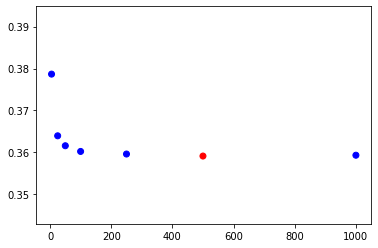

In [31]:
#The error in the first approach is quite high. Let us iterate to find the optimal tree parameters

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500,1000]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae=[]
for x in candidate_max_leaf_nodes:
    mae.append(get_mae_tree(x,train_X, val_X, train_y, val_y))

# Store the best value of max_leaf_nodes 
best_tree_size = candidate_max_leaf_nodes[mae.index(min(mae))]

#Show the minimum MAE highlighted in red
minMae = np.min(mae)
mask = np.array(mae) == minMae
color = np.where(mask, 'red', 'blue')
plt.scatter(candidate_max_leaf_nodes,mae, color=color)


In [33]:
#Create optimal tree model
final_tree_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model with the whole dataset and calculate error
final_tree_model.fit(X, y)
val_predictions = final_tree_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.3f}".format(val_mae))

Validation MAE: 0.340


**Random Forest**

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit the model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
predict_y=rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y,predict_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 0.3679428571428571


In [35]:
#We define a function that returns the Mean Absolute error of the Random Forest. We will check for this purpose
# two parameters of the Random Forest regressor, the depth and the leaf nodes
def get_mae_forest(max_depth, max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

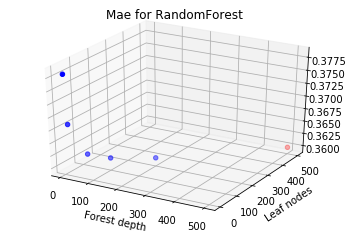

In [41]:
#The error in the first approach is quite high. Let us iterate to find the optimal tree parameters

candidate_max_leaf_nodes = [5, 10,50,100,200,500]
candidate_max_depth = [5, 10,50,100,200,500]

# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae=[]
for i, x  in enumerate(candidate_max_depth):
    mae.append(get_mae_forest(x, candidate_max_leaf_nodes[i], train_X, val_X, train_y, val_y))

# Store the best value of max_leaf_nodes 
best_tree_size = candidate_max_leaf_nodes[mae.index(min(mae))]
best_depth = candidate_max_depth[mae.index(min(mae))]

#Show the minimum MAE highlighted in red and plot in 3D the MAE corresponding to the leaf nodes and depth fo the Random Forest
minMae = np.min(mae)
mask = np.array(mae) == minMae
color = np.where(mask, 'red', 'blue')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(candidate_max_depth,candidate_max_leaf_nodes ,mae, color=color);
ax.set_title('Mae for RandomForest');
ax.set_xlabel('Forest depth');
ax.set_ylabel('Leaf nodes');
#ax.set_zlim(zmin= 0.2, zmax=0.5)

In [37]:
#Create optimal random forest model
final_forest_model = RandomForestRegressor(max_depth=best_depth, max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model with the whole dataset and calculate error
final_forest_model.fit(X, y)
val_predictions = final_tree_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.3f}".format(val_mae))

Validation MAE: 0.340


Conclusions so far:
- We see that the random forest and the decision tree equally perform when they are optimized with the number of leaf nodes.

### XGBoost model

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor

features = ['Id','Age', 'Sex', 'Height', 'Weight','SystolicPressure', 'DiastolicPressure', 'Cholesterol', 'Smoker', 'Alcoholic',
           'ActiveSport']
X = df_stroke2[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [26]:
xgbModel = XGBRegressor(random_state=0, n_estimators=1000, learning_rate=0.1)

xgbModel.fit(train_X,train_y)

[19:59:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:
val_predictions = xgbModel.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.3f}".format(val_mae))

Validation MAE: 0.361
